In [2]:
import pandas as pd
import requests

source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [3]:
df.shape # structure (rows, columns)

(28, 9)

In [4]:
import numpy as np
df.replace('—', np.nan, inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [5]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [6]:
for col in df.columns:
    if col != "Регіон" and df[col].dtype == object: 
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')

print(df.dtypes)        

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [7]:
for column in df.columns:
    nan_values = df[column].isnull().sum()
    if nan_values > 0:
        print(f'{column}: {nan_values}')

1950: 2
1960: 1
1970: 1
2014: 2
2019: 4


In [8]:
df.drop([27], inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [9]:
df_new = df.fillna(df.drop(columns=['Регіон']).mean().round(2), inplace=False)
df_new

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.60,16.0,13.0,7.3,12.6,11.14,8.02
1,Вінницька,22.4,19.20,14.2,12.4,8.4,11.2,10.90,7.60
2,Волинська,24.7,25.00,17.9,15.3,11.2,14.8,14.10,10.10
3,Дніпропетровська,20.4,20.40,15.1,12.3,7.1,11.2,11.10,7.10
4,Донецька,27.1,21.40,14.0,10.9,6.1,9.8,8.20,8.02
5,Житомирська,26.1,22.30,15.9,12.9,8.9,12.2,12.00,7.90
6,Закарпатська,31.4,27.30,20.7,16.8,11.5,15.1,14.60,10.40
7,Запорізька,21.9,19.70,15.0,12.4,7.1,10.6,10.60,6.80
8,Івано-Франківська,24.3,24.80,18.2,15.5,10.3,12.4,12.20,8.80
9,Київська,20.4,18.90,15.6,12.3,7.3,12.2,12.10,8.00


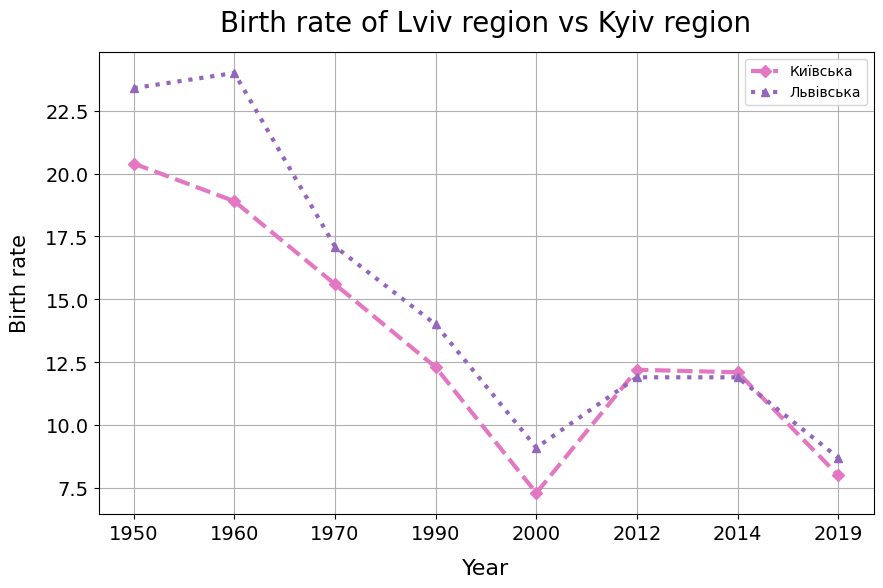

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

regions = ['Київська', 'Львівська']

df_regions = df_new[df_new['Регіон'].isin(regions)].melt(id_vars=['Регіон'], 
                                                       value_vars=['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019'],  # Specified years
                                                       var_name='Year', 
                                                       value_name='Birth Rate')

plt.figure(figsize=(10, 6))

plt.plot(
    df_regions[df_regions['Регіон'] == 'Київська']['Year'], 
    df_regions[df_regions['Регіон'] == 'Київська']['Birth Rate'],
    label="Київська",
    linestyle="--",
    color="#E377C2",
    linewidth=3,
    marker="D",
)

plt.plot(
    df_regions[df_regions['Регіон'] == 'Львівська']['Year'], 
    df_regions[df_regions['Регіон'] == 'Львівська']['Birth Rate'],
    label="Львівська",
    linestyle=":",
    color="#9467BD",
    linewidth=3,
    marker="^",
)

plt.xlabel("Year", fontsize=16, labelpad=11)
plt.ylabel("Birth rate", fontsize=15, labelpad=11)
plt.title("Birth rate of Lviv region vs Kyiv region", fontsize=20, pad=15)
plt.legend()
plt.grid()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [11]:
df_average_2019 = df_new['2019'].mean().round(2)
df_average_2019

np.float64(8.02)

In [12]:
for index, row in df_new.iterrows():
    if row['2019'] > df_new['2019'].mean().round(2):
        print(f'{row['Регіон']}')

Волинська
Закарпатська
Івано-Франківська
Львівська
Одеська
Рівненська
Херсонська
Чернівецька
Київ


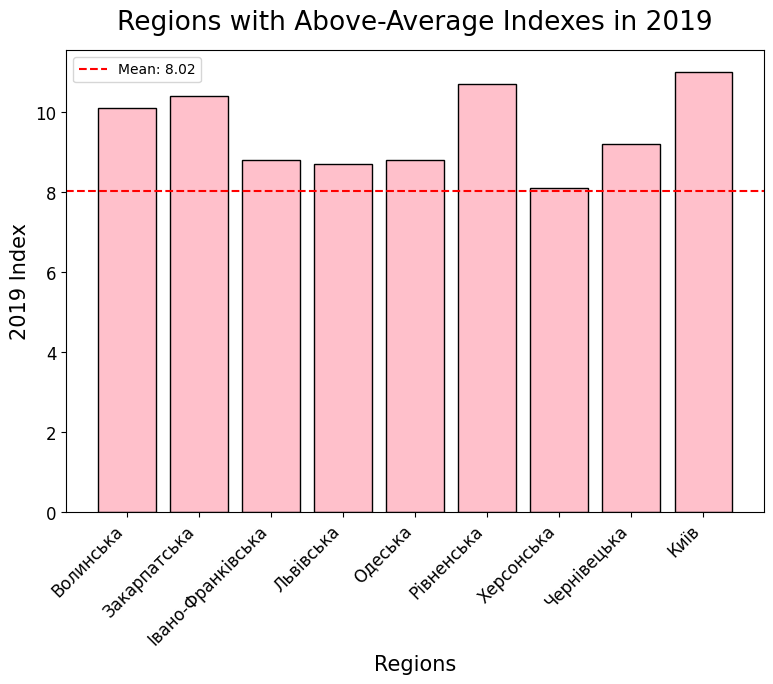

In [13]:
import matplotlib.pyplot as plt

df_average_2019 = df_new['2019'].mean().round(2)
filtered_df = df_new[df_new['2019'] > df_average_2019]  

plt.figure(figsize=(9, 6))
plt.bar(filtered_df['Регіон'], filtered_df['2019'], color='pink', edgecolor='black')

plt.axhline(df_average_2019, color='red', linestyle='dashed', label=f'Mean: {df_average_2019}') 
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)
plt.ylabel('2019 Index',fontsize=15)
plt.xlabel('Regions', fontsize=15)
plt.title('Regions with Above-Average Indexes in 2019',fontsize=19, pad=15)
plt.legend()

plt.show()

In [14]:
max_birth_rate =  df_new.loc[df_new['2014']==df_new['2014'].max(),'Регіон']
print(max_birth_rate)

16    Рівненська
Name: Регіон, dtype: object


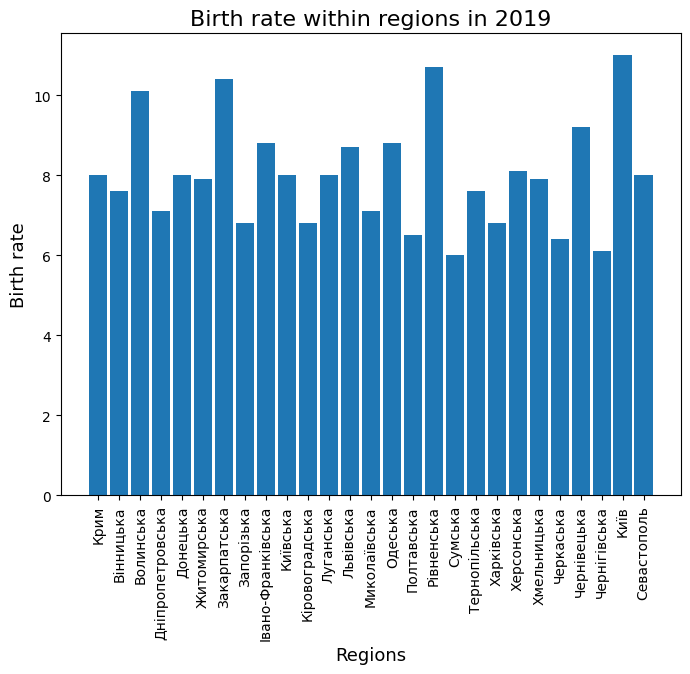

In [15]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))
plt.bar(df_new['Регіон'], df_new['2019'], width=0.87)
plt.xlabel('Regions', fontsize=13)
plt.ylabel('Birth rate', fontsize=13)
plt.title('Birth rate within regions in 2019', fontsize=16)
plt.xticks(rotation=90)

plt.show()
